# Simulation of Epidemics

We are Group #13 comprised of the following students:
    
    Ioannis Koumaniotis - s212887
    Georgios Kapakoglou - s223001
    Anastasios Mavridis - s230093
    Dimitris Sousounis - s230118

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Part I Basic Modeling

### SIR

The following model simulates the evolution of the population during a pandemic. Each individual can belong in one of the three states: susceptible, infected or removed (removed means either permanent immunity or deceased, ie impossible to become susceptible again). The model encorporates the transition rates between states. This approach is a stochastic one, differing from the ode solver approach.

Starting from an initial population N, we are showcasing the SIR model with the appropriate parameters. We produce the stochastic variables using binomial distributions.

Lastly we are checking the likelihood that the disease disapears by enumerating the simulations that it happens and subsequentlty dividing with the total number of simulations. We also examine whether cyclical behaviour appears in the model.

All the probability rates where chosen arbitrarily but their functional form was obtained from the Differential Systems for each particular model in Wikipedia.

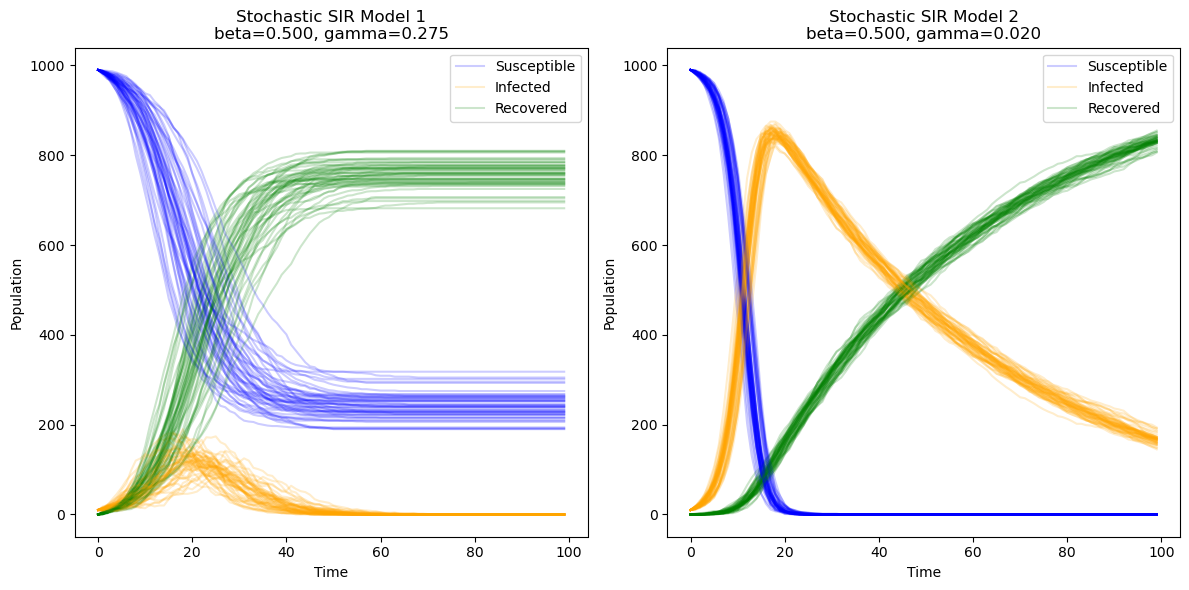

Model 1: The likelihood that the disease will disappear within 100 time units is: 1.0
Model 1: The likehood that the dicease exhibits cyclical behaviour is: 1.0

Model 2: The likelihood that the disease will disappear within 100 time units is: 0.0
Model 2: The likehood that the dicease exhibits cyclical behaviour is: 0.32


In [2]:
def simulate_sir_model(N, I0, R0, beta, gamma, num_iterations):

    S = np.zeros(num_iterations)
    I = np.zeros(num_iterations)
    R = np.zeros(num_iterations)
    
    S[0] = N - I0 - R0
    I[0] = I0
    R[0] = R0
    
    for t in range(1, num_iterations):
        
        susceptible_to_infected = np.random.binomial(S[t-1], beta*I[t-1]/N)
        infected_to_recovered = np.random.binomial(I[t-1], gamma)
        
        S[t] = S[t-1] - susceptible_to_infected
        I[t] = I[t-1] + susceptible_to_infected - infected_to_recovered
        R[t] = R[t-1] + infected_to_recovered
        #print(S[t], I[t], R[t], S[t]+I[t]+R[t])
    
    return S, I, R

# Parameters
N = 1000 # Total population size
I0 = 10 # Initial number of infected individuals
R0 = 0 # Initial number of recovered individuals
beta1 = 0.5 # Transmission rate
gamma1 = 0.275 # Recovery/Removed rate
beta2 = 0.5
gamma2 = 0.02
num_iterations = 100 # Number of iterations to simulate
time = np.arange(num_iterations)
num_sims = 50

count1a = 0
count2a = 0
count1b = 0
count2b = 0
time_list = []
S_SIR = np.zeros((num_sims, num_iterations))
I_SIR = np.zeros((num_sims, num_iterations))
R_SIR = np.zeros((num_sims, num_iterations))
S_SIR2 = np.zeros((num_sims, num_iterations))
I_SIR2 = np.zeros((num_sims, num_iterations))
R_SIR2 = np.zeros((num_sims, num_iterations))

for i in range(num_sims):

    # Simulate SIR model
    S, I, R = simulate_sir_model(N, I0, R0, beta1, gamma1, num_iterations)
    S_SIR[i,:] = S
    I_SIR[i,:] = I
    R_SIR[i,:] =  R

    S, I, R = simulate_sir_model(N, I0, R0, beta2, gamma2, num_iterations)
    S_SIR2[i,:] = S
    I_SIR2[i,:] = I
    R_SIR2[i,:] =  R

    if np.any(I_SIR[i, :] == 0):
        count1a += 1

    check_list = set()
    time_sublist = []
    for j in range(num_iterations):
        tmp = (S_SIR[i,j], I_SIR[i,j], R_SIR[i,j])
        if tmp in check_list:
            count2a += 1
            time_sublist.append(j)
            #print('Repeated elements found in simulation', i)
            break
        check_list.add(tmp)
    #else:
        #print('No repetitive elemenents were found in simulation', i)
    if len(time_sublist) != 0:
        time_list.append(time_sublist)

    if np.any(I_SIR2[i, :] == 0):
        count1b += 1

    check_list = set()
    time_sublist = []
    for j in range(num_iterations):
        tmp = (S_SIR2[i,j], I_SIR2[i,j], R_SIR2[i,j])
        if tmp in check_list:
            count2b += 1
            time_sublist.append(j)
            #print('Repeated elements found in simulation', i)
            break
        check_list.add(tmp)
    #else:
        #print('No repetitive elemenents were found in simulation', i)
    if len(time_sublist) != 0:
        time_list.append(time_sublist)


# Plot the SIR model
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i in range(num_sims):
    axs[0].plot(time, S_SIR[i, :], color='blue', alpha=0.2)
    axs[0].plot(time, I_SIR[i, :], color='orange', alpha=0.2)
    axs[0].plot(time, R_SIR[i, :], color='green', alpha=0.2)

    axs[1].plot(time, S_SIR2[i, :], color='blue', alpha=0.2)
    axs[1].plot(time, I_SIR2[i, :], color='orange', alpha=0.2)
    axs[1].plot(time, R_SIR2[i, :], color='green', alpha=0.2)

axs[0].set_title('Stochastic SIR Model 1\nbeta={:.3f}, gamma={:.3f}'.format(beta1, gamma1))
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Population')
axs[0].legend(['Susceptible', 'Infected', 'Recovered'])

axs[1].set_title('Stochastic SIR Model 2\nbeta={:.3f}, gamma={:.3f}'.format(beta2, gamma2))
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Population')
axs[1].legend(['Susceptible', 'Infected', 'Recovered'])

plt.tight_layout()
plt.show()

print('Model 1: The likelihood that the disease will disappear within',num_iterations,'time units is:',count1a/num_sims)
#print(count2,'out of',num_sims,'simulations exhibit repeated elements at times', time_list)
print('Model 1: The likehood that the dicease exhibits cyclical behaviour is:',count2a/num_sims)
print()
print('Model 2: The likelihood that the disease will disappear within',num_iterations,'time units is:',count1b/num_sims)
#print(count2,'out of',num_sims,'simulations exhibit repeated elements at times', time_list)
print('Model 2: The likehood that the dicease exhibits cyclical behaviour is:',count2b/num_sims)

### SIR with vital dynamics

We repeat the same procudure with the notable difference that we now also introduce birthrates and deathrates that are irrelevant to the pandemic. Thus the system has extra degrees of freedom since we can have a variable total number of people involved.

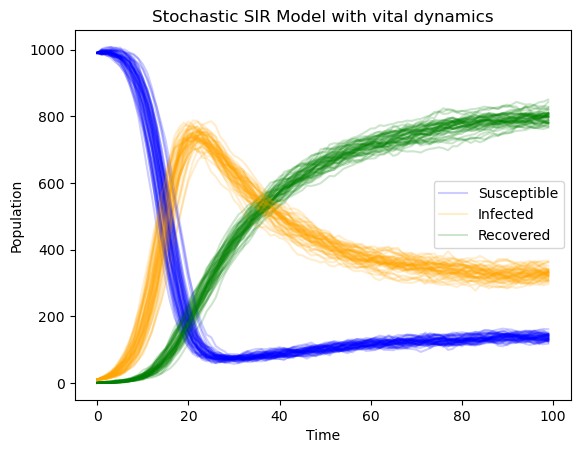

The likelihood that the disease will dissappear within 100 time units is: 0.0
The likehood that the dicease exhibits cyclical behaviour is: 0.08


In [3]:
def simulate_sir2_model(N, I0, R0, beta, gamma, L, mu, num_iterations):

    S = np.zeros(num_iterations)
    I = np.zeros(num_iterations)
    R = np.zeros(num_iterations)
    
    S[0] = N - I0
    I[0] = I0
    R[0] = R0
    
    for t in range(1,num_iterations):

        susceptible_to_smth = np.random.multinomial(S[t-1], [beta*I[t-1]/N, mu, 1-beta*I[t-1]/N-mu])
        susceptible_to_infected = susceptible_to_smth[0]
        susceptible_to_die = susceptible_to_smth[1]

        infected_to_smth = np.random.multinomial(I[t-1], [gamma, mu, 1-gamma-mu])
        infected_to_recovered = infected_to_smth[0]
        infected_to_die = infected_to_smth[1]

        recovered_to_die = np.random.binomial(R[t-1], mu)

        S[t] = S[t-1] + L - susceptible_to_die - susceptible_to_infected
        I[t] = I[t-1] + susceptible_to_infected - infected_to_recovered - infected_to_die
        R[t] = R[t-1] + infected_to_recovered - recovered_to_die
        #print(S[t], I[t], R[t], S[t]+I[t]+R[t])
    
    return S, I, R

# Parameters
N = 1000 # Total population size
I0 = 10 # Initial number of infected individuals
R0 = 0 # Initial number of recovered individuals
beta = 0.4 # Transmission rate
gamma = 0.04 # Recovery rate
L = 20 # birth rate
mu = 0.015 # death rate
num_iterations = 100 # Number of iterations to simulate
time = np.arange(num_iterations)
num_sims = 50

count1 = 0
count2 = 0
count3 = 0 
time_list = []
S_SIR2 = np.zeros((num_sims, num_iterations))
I_SIR2 = np.zeros((num_sims, num_iterations))
R_SIR2 = np.zeros((num_sims, num_iterations))

for i in range(num_sims):

    # Simulate SIR model
    S, I, R = simulate_sir2_model(N, I0, R0, beta, gamma, L, mu, num_iterations)
    S_SIR2[i,:] = S
    I_SIR2[i,:] = I
    R_SIR2[i,:] = R

    if np.any(I_SIR2[i, :] == 0):
        count1 += 1
    if np.any(S_SIR2[i, :] == 0) and np.any(R_SIR2[i, :] == 0):
        count3 += 1

    check_list = set()
    time_sublist = []
    for j in range(num_iterations):
        tmp = (S_SIR2[i,j], I_SIR2[i,j], R_SIR2[i,j])
        if tmp in check_list:
            count2 += 1
            time_sublist.append(j)
            #print('Repeated elements found in simulation', i)
            break
        check_list.add(tmp)
    #else:
        #print('No repetitive elemenents were found in simulation', i)
    if len(time_sublist) != 0:
        time_list.append(time_sublist)

    # Plot the SIR model
    plt.plot(time, S_SIR2[i, :], color='blue', alpha=0.2)
    plt.plot(time, I_SIR2[i, :], color='orange', alpha=0.2)
    plt.plot(time, R_SIR2[i, :], color='green', alpha=0.2)


plt.plot(time, S_SIR2[0, :], color='blue', alpha=0.2, label='Susceptible')
plt.plot(time, I_SIR2[0, :], color='orange', alpha=0.2, label='Infected')
plt.plot(time, R_SIR2[0, :], color='green', alpha=0.2, label='Recovered')
plt.title('Stochastic SIR Model with vital dynamics')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

print('The likelihood that the disease will dissappear within',num_iterations,'time units is:',count1/num_sims)
#print('The likelihood that we will all die within',num_iterations,'time units is:',count3/num_sims)
#print(count2,'out of',num_sims,'simulations exhibit repeated elements at times', time_list)
print('The likehood that the dicease exhibits cyclical behaviour is:',count2/num_sims)

### SIS

We hereby introduce the ability for the population in the infected group to relocate immediately back to the susceptible one.

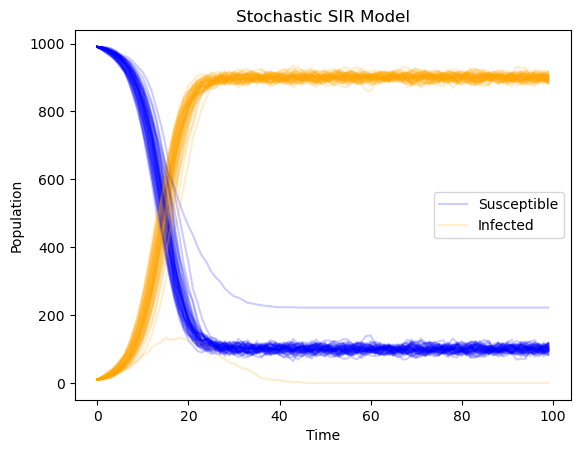

The likelihood that the disease will dissappear within 100 time units is: 0.0
The likehood that the dicease exhibits cyclical behaviour is: 1.0


In [4]:
def simulate_sir_model(N, I0, beta, gamma, num_iterations):

    S = np.zeros(num_iterations)
    I = np.zeros(num_iterations)
    
    S[0] = N - I0 - R0
    I[0] = I0
    
    for t in range(1, num_iterations):
        
        susceptible_to_infected = np.random.binomial(S[t-1], beta*I[t-1]/N)
        infected_to_susceptible = np.random.binomial(I[t-1], gamma)
        
        S[t] = S[t-1] - susceptible_to_infected + infected_to_susceptible
        I[t] = I[t-1] + susceptible_to_infected - infected_to_susceptible
        #print(S[t], I[t], S[t]+I[t])
    
    return S, I

# Parameters
N = 1000 # Total population size
I0 = 10 # Initial number of infected individuals
beta = 0.4 # Transmission rate
gamma = 0.04 # Recovery rate
num_iterations = 100 # Number of iterations to simulate
time = np.arange(num_iterations)
num_sims = 50

count1 = 0
count2 = 0
time_list = []
S_SIS = np.zeros((num_sims, num_iterations))
I_SIS = np.zeros((num_sims, num_iterations))

for i in range(num_sims):

    # Simulate SIR model
    S, I = simulate_sir_model(N, I0, beta, gamma, num_iterations)
    S_SIS[i,:] = S
    I_SIS[i,:] = I

    if np.any(I_SIS[i, :] == 0):
        count1 += 1

    check_list = set()
    time_sublist = []
    for j in range(num_iterations):
        tmp = (S_SIS[i,j], I_SIS[i,j])
        if tmp in check_list:
            count2 += 1
            time_sublist.append(j)
            #print('Repeated elements found in simulation', i)
            break
        check_list.add(tmp)
    #else:
        #print('No repetitive elemenents were found in simulation', i)
    if len(time_sublist) != 0:
        time_list.append(time_sublist)

    # Plot the SIR model
    plt.plot(time, S_SIS[i, :], color='blue', alpha=0.2)
    plt.plot(time, I_SIS[i, :], color='orange', alpha=0.2)


plt.plot(time, S_SIR[0, :], color='blue', alpha=0.2, label='Susceptible')
plt.plot(time, I_SIR[0, :], color='orange', alpha=0.2, label='Infected')
plt.title('Stochastic SIR Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

print('The likelihood that the disease will dissappear within',num_iterations,'time units is:',count1/num_sims)
#print(count2,'out of',num_sims,'simulations exhibit repeated elements at times', time_list)
print('The likehood that the dicease exhibits cyclical behaviour is:',count2/num_sims)

### Deadly SIR

We will now take the model to the extreme case where the mortality rate due to the virus is chosen to be substantially large. We consider the simple SIR model with no birthrate and no deaths due to natural causes. We run the simulation and showcase the percentage of the simulations where the whole population was exstinguished because of the pandemic.

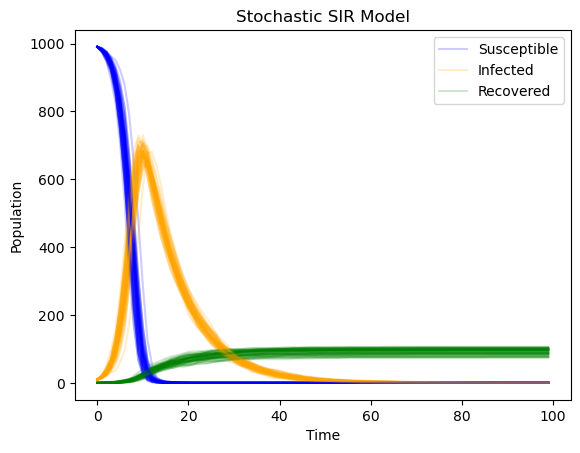

The likelihood that the disease will disappear within 100 time units is: 0.94
The likehood that the dicease exhibits cyclical behaviour is: 1.0
The likelihood that we will all die within 100 time units is: 0.0


In [5]:
def simulate_sir3_model(N, I0, R0, beta, gamma, epsilon, num_iterations):

    S = np.zeros(num_iterations)
    I = np.zeros(num_iterations)
    R = np.zeros(num_iterations)
    
    S[0] = N - I0 - R0
    I[0] = I0
    R[0] = R0
    
    for t in range(1, num_iterations):
        
        susceptible_to_infected = np.random.binomial(S[t-1], beta*I[t-1]/N)
        infected_to_smth = np.random.multinomial(I[t-1], [epsilon , gamma, 1-epsilon-gamma])
        infected_to_dead = infected_to_smth[0]
        infected_to_recovered = infected_to_smth[1]
        
        S[t] = S[t-1] - susceptible_to_infected
        I[t] = I[t-1] + susceptible_to_infected - infected_to_recovered - infected_to_dead
        R[t] = R[t-1] + infected_to_recovered
        #print(S[t], I[t], R[t], S[t]+I[t]+R[t])
    
    return S, I, R

# Parameters
N = 1000 # Total population size
I0 = 10 # Initial number of infected individuals
R0 = 0 # Initial number of recovered individuals
beta = 0.9 # Transmission rate
gamma = 0.01 # Recovery/Removed rate
epsilon = 0.1 # Virus death rate
num_iterations = 100 # Number of iterations to simulate
time = np.arange(num_iterations)
num_sims = 50

count1 = 0
count2 = 0
count3 = 0
time_list = []
S_SIR3 = np.zeros((num_sims, num_iterations))
I_SIR3 = np.zeros((num_sims, num_iterations))
R_SIR3 = np.zeros((num_sims, num_iterations))

for i in range(num_sims):

    # Simulate SIR model
    S, I, R = simulate_sir3_model(N, I0, R0, beta, gamma, epsilon, num_iterations)
    S_SIR3[i,:] = S
    I_SIR3[i,:] = I
    R_SIR3[i,:] = R

    if np.any(I_SIR3[i, :] == 0):
        count1 += 1

    check_list = set()
    time_sublist = []
    for j in range(num_iterations):
        if (S_SIR3[i, j] == 0) and (R_SIR3[i, j] == 0):
            count3 += 1
            break
    for j in range(num_iterations):
        tmp = (S_SIR3[i,j], I_SIR3[i,j], R_SIR3[i,j])
        if tmp in check_list:
            count2 += 1
            time_sublist.append(j)
            #print('Repeated elements found in simulation', i)
            break
        check_list.add(tmp)
    #else:
        #print('No repetitive elemenents were found in simulation', i)
    if len(time_sublist) != 0:
        time_list.append(time_sublist)

    # Plot the SIR model
    plt.plot(time, S_SIR3[i, :], color='blue', alpha=0.2)
    plt.plot(time, I_SIR3[i, :], color='orange', alpha=0.2)
    plt.plot(time, R_SIR3[i, :], color='green', alpha=0.2)


plt.plot(time, S_SIR3[0, :], color='blue', alpha=0.2, label='Susceptible')
plt.plot(time, I_SIR3[0, :], color='orange', alpha=0.2, label='Infected')
plt.plot(time, R_SIR3[0, :], color='green', alpha=0.2, label='Recovered')
plt.title('Stochastic SIR Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

print('The likelihood that the disease will disappear within',num_iterations,'time units is:',count1/num_sims)
#print(count2,'out of',num_sims,'simulations exhibit repeated elements at times', time_list)
print('The likehood that the dicease exhibits cyclical behaviour is:',count2/num_sims)
print('The likelihood that we will all die within',num_iterations,'time units is:',count3/num_sims)

We tried to find the parameter set where the model behaves deterministically. We noticed small deviations from the analytical solution of the ODE system if we were to choose a big number of people. This makes sense because for a large data set the probabilities resemble more accurately the changes due to the dynamics of the differential equations describing the system.

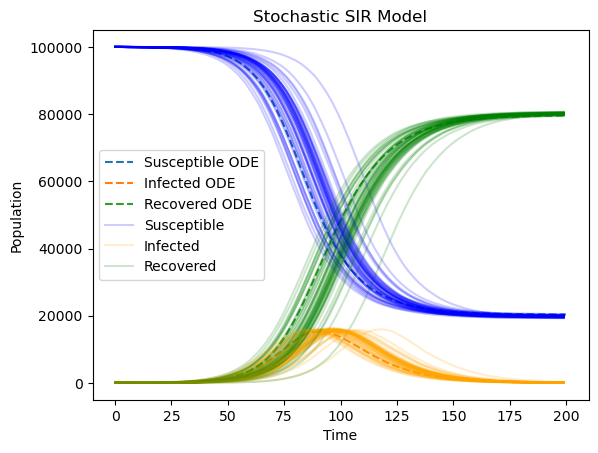

In [6]:
# Function that defines the SIR model
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I/N
    dIdt = beta * S * I/N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

def simulate_sir_model(N, I0, R0, beta, gamma, num_iterations):

    S = np.zeros(num_iterations)
    I = np.zeros(num_iterations)
    R = np.zeros(num_iterations)
    
    S[0] = N - I0 - R0
    I[0] = I0
    R[0] = R0
    
    for t in range(1, num_iterations):
        
        susceptible_to_infected = np.random.binomial(S[t-1], beta*I[t-1]/N)
        infected_to_recovered = np.random.binomial(I[t-1], gamma)
        
        S[t] = S[t-1] - susceptible_to_infected
        I[t] = I[t-1] + susceptible_to_infected - infected_to_recovered
        R[t] = R[t-1] + infected_to_recovered
        #print(S[t], I[t], R[t], S[t]+I[t]+R[t])
    
    return S, I, R

# Parameters
N = 100000 # Total population size
I0 = 10 # Initial number of infected individuals
R0 = 0 # Initial number of recovered individuals
beta = 0.2 # Transmission rate
gamma = 0.1 # Recovery/Removed rate
num_iterations = 200 # Number of iterations to simulate
time = np.arange(num_iterations)
num_sims = 50

# Time points to simulate
t = np.linspace(0, num_iterations, 1000)

# Initial conditions
y0 = [N-I0-R0, I0, R0]

# Solve the differential equations
sol = odeint(sir_model, y0, t, args=(beta, gamma))

# Extract the solution
S = sol[:, 0]
I = sol[:, 1]
R = sol[:, 2]

# Plot the results
plt.plot(t, S, linestyle='--', label='Susceptible ODE')
plt.plot(t, I, linestyle='--', label='Infected ODE')
plt.plot(t, R, linestyle='--', label='Recovered ODE')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('SIR Pandemic Model')
plt.legend()

S_SIR = np.zeros((num_sims, num_iterations))
I_SIR = np.zeros((num_sims, num_iterations))
R_SIR = np.zeros((num_sims, num_iterations))

for i in range(num_sims):

    # Simulate SIR model
    S, I, R = simulate_sir_model(N, I0, R0, beta, gamma, num_iterations)
    S_SIR[i,:] = S
    I_SIR[i,:] = I
    R_SIR[i,:] =  R

    # Plot the SIR model
    plt.plot(time, S_SIR[i, :], color='blue', alpha=0.2)
    plt.plot(time, I_SIR[i, :], color='orange', alpha=0.2)
    plt.plot(time, R_SIR[i, :], color='green', alpha=0.2)

plt.plot(time, S_SIR[0, :], color='blue', alpha=0.2, label='Susceptible')
plt.plot(time, I_SIR[0, :], color='orange', alpha=0.2, label='Infected')
plt.plot(time, R_SIR[0, :], color='green', alpha=0.2, label='Recovered')
plt.title('Stochastic SIR Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()


## Part II - Some ideas for further studies

 ### SIRS

The alterations in this model is that the R state now only includes the recovered individuals. Furthermore, the recovered can possible become susceptible again.

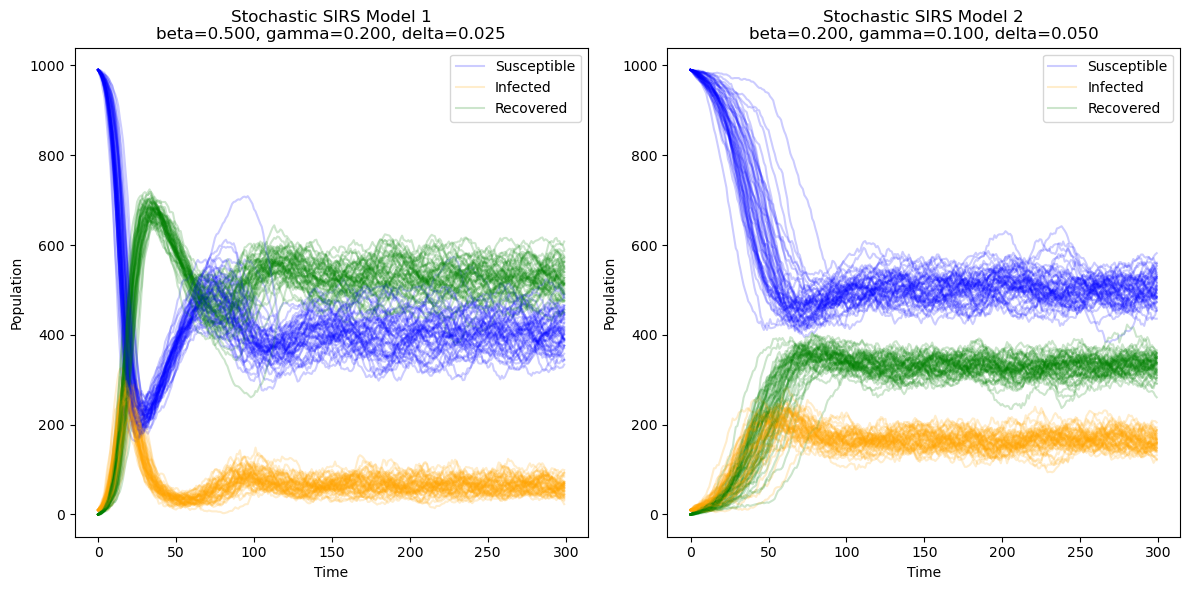

Model 1: The likelihood that the disease will disappear within 300 time units is: 0.0
Model 1: The likehood that the dicease exhibits cyclical behaviour is: 1.0

Model 2: The likelihood that the disease will disappear within 300 time units is: 0.0
Model 2: The likehood that the dicease exhibits cyclical behaviour is: 1.0


In [7]:

def simulate_sirs_model(N, I0, R0, beta, gamma, delta, num_iterations):

    S = np.zeros(num_iterations)
    I = np.zeros(num_iterations)
    R = np.zeros(num_iterations)
    
    S[0] = N - I0 - R0
    I[0] = I0
    R[0] = R0
        
    for t in range(1, num_iterations):
        
        susceptible_t0_infected = np.random.binomial(S[t-1], beta*I[t-1]/N)
        infected_to_recovered = np.random.binomial(I[t-1], gamma)
        recovered_to_susceptible = np.random.binomial(R[t-1], delta)
        
        S[t] = S[t-1] - susceptible_t0_infected + recovered_to_susceptible
        I[t] = I[t-1] + susceptible_t0_infected - infected_to_recovered
        R[t] = R[t-1] + infected_to_recovered - recovered_to_susceptible
        #print(S[t], I[t], R[t], S[t]+I[t]+R[t])

    return S, I, R

# Parameters
N = 1000 # Total population size
I0 = 10 # Initial number of infected individuals
R0 = 0 # Initial number of recovered individuals
D0 = 0 # Initial number of deceased individuals
beta1 = 0.5 # Transmission rate
gamma1 = 0.2 # Recovery rate
delta1 = 0.025 # Reinfection rate
beta2 = 0.2 # Transmission rate
gamma2 = 0.1 # Recovery rate
delta2 = 0.05 # Reinfection rate
num_iterations = 300 # Number of iterations to simulate
time = np.arange(num_iterations)
num_sims = 50
count1a = 0
count2a = 0
count1b = 0
count2b = 0

S_SIRS = np.zeros((num_sims, num_iterations))
I_SIRS = np.zeros((num_sims, num_iterations))
R_SIRS = np.zeros((num_sims, num_iterations))

S_SIRS2 = np.zeros((num_sims, num_iterations))
I_SIRS2 = np.zeros((num_sims, num_iterations))
R_SIRS2 = np.zeros((num_sims, num_iterations))

for i in range(num_sims):

    # Simulate SIR model
    S, I, R = simulate_sirs_model(N, I0, R0, beta1, gamma1, delta1, num_iterations)
    S_SIRS[i,:] = S
    I_SIRS[i,:] = I
    R_SIRS[i,:] =  R

    S, I, R = simulate_sirs_model(N, I0, R0, beta2, gamma2, delta2, num_iterations)
    S_SIRS2[i,:] = S
    I_SIRS2[i,:] = I
    R_SIRS2[i,:] =  R

    if np.any(I_SIRS[i, :] == 0):
        count1a += 1

    check_list = set()
    for j in range(num_iterations):
        tmp = (S_SIRS[i,j], I_SIRS[i,j], R_SIRS[i,j])
        if tmp in check_list:
            count2a += 1
            #print('Repeated elements found in simulation', i)
            break
        check_list.add(tmp)
    #else:
        #print('No repetitive elemenents were found in simulation', i)

    if np.any(I_SIRS2[i, :] == 0):
        count1b += 1

    check_list = set()
    for j in range(num_iterations):
        tmp = (S_SIRS2[i,j], I_SIRS2[i,j], R_SIRS2[i,j])
        if tmp in check_list:
            count2b += 1
            #print('Repeated elements found in simulation', i)
            break
        check_list.add(tmp)

# Plot the SIR model
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i in range(num_sims):
    axs[0].plot(time, S_SIRS[i, :], color='blue', alpha=0.2)
    axs[0].plot(time, I_SIRS[i, :], color='orange', alpha=0.2)
    axs[0].plot(time, R_SIRS[i, :], color='green', alpha=0.2)

    axs[1].plot(time, S_SIRS2[i, :], color='blue', alpha=0.2)
    axs[1].plot(time, I_SIRS2[i, :], color='orange', alpha=0.2)
    axs[1].plot(time, R_SIRS2[i, :], color='green', alpha=0.2)

axs[0].set_title('Stochastic SIRS Model 1\nbeta={:.3f}, gamma={:.3f}, delta={:.3f}'.format(beta1, gamma1, delta1))
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Population')
axs[0].legend(['Susceptible', 'Infected', 'Recovered'])

axs[1].set_title('Stochastic SIRS Model 2\nbeta={:.3f}, gamma={:.3f}, delta={:.3f}'.format(beta2, gamma2, delta2))
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Population')
axs[1].legend(['Susceptible', 'Infected', 'Recovered'])

plt.tight_layout()
plt.show()

print('Model 1: The likelihood that the disease will disappear within',num_iterations,'time units is:',count1a/num_sims)
#print(count2,'out of',num_sims,'simulations exhibit repeated elements at times', time_list)
print('Model 1: The likehood that the dicease exhibits cyclical behaviour is:',count2a/num_sims)
print()
print('Model 2: The likelihood that the disease will disappear within',num_iterations,'time units is:',count1b/num_sims)
#print(count2,'out of',num_sims,'simulations exhibit repeated elements at times', time_list)
print('Model 2: The likehood that the dicease exhibits cyclical behaviour is:',count2b/num_sims)

SIRD

In this simulation we employed an analogous approach to that of the SIR with a high mortality rate. In contrast to the previous model we have introduced an extra state for keeping track of the deceased population in the model.

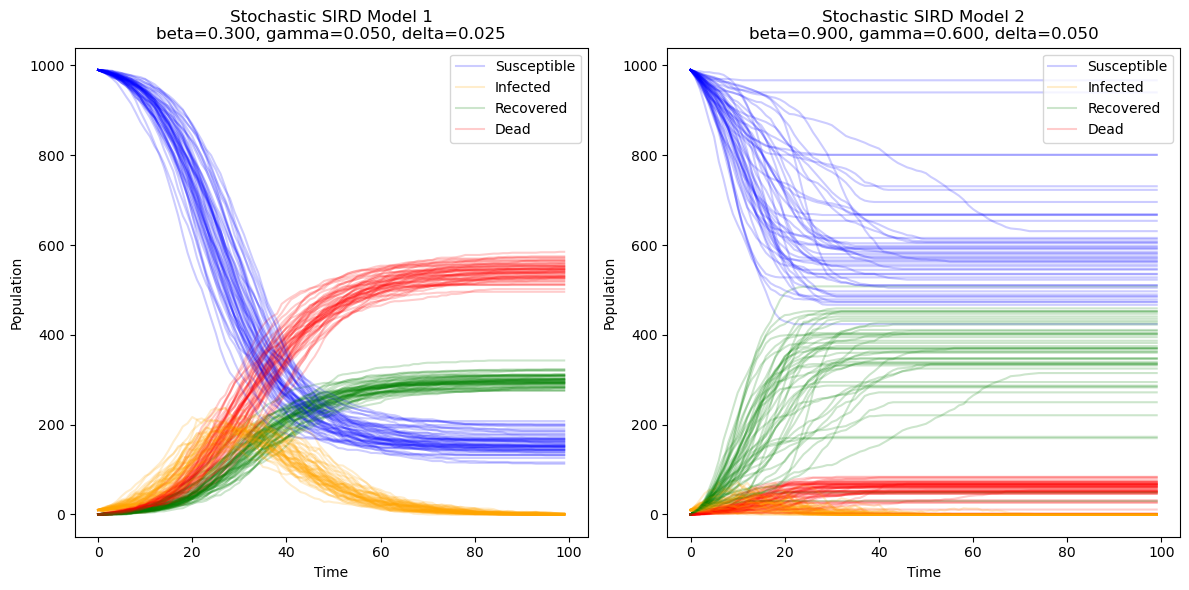

Model 1: The likelihood that the disease will disappear within 100 time units is: 0.68
Model 1: The likehood that the dicease exhibits cyclical behaviour is: 1.0

Model 2: The likelihood that the disease will disappear within 100 time units is: 1.0
Model 2: The likehood that the dicease exhibits cyclical behaviour is: 1.0


In [8]:

def simulate_sird_model(N, I0, R0, D0, beta, gamma, epsilon, num_iterations):

    S = np.zeros(num_iterations)
    I = np.zeros(num_iterations)
    R = np.zeros(num_iterations)
    D = np.zeros(num_iterations)
        
    S[0] = N - I0 - R0
    I[0] = I0
    R[0] = R0
    D[0] = D0
        
    for t in range(1, num_iterations):

        susceptible_t0_infected = np.random.binomial(S[t-1], beta*I[t-1]/N)
        # infected_to_recovered = np.random.binomial(I[t-1], gamma)
        # infected_to_dead = np.random.binomial(I[t-1], mu)

        infected_to_smth = np.random.multinomial(I[t-1], [gamma, epsilon, 1-gamma-mu])
        infected_to_recovered = infected_to_smth[0]
        infected_to_dead = infected_to_smth[1]
        
        S[t] = S[t-1] - susceptible_t0_infected
        I[t] = I[t-1] + susceptible_t0_infected - infected_to_recovered - infected_to_dead
        R[t] = R[t-1] + infected_to_recovered
        D[t] = D[t-1] + infected_to_dead
        #print(S[t], I[t], R[t], D[t], S[t]+I[t]+R[t]+D[t])

    return S, I, R, D

# Parameters
N = 1000 # Total population size
I0 = 10 # Initial number of infected individuals
R0 = 0 # Initial number of recovered individuals
D0 = 0 # Initial number of deceased individuals
beta1 = 0.3 # Transmission rate
gamma1 = 0.05 # Recovery rate
epsilon1 = 0.09 # Virus death rate
beta2 = 0.9 # Transmission rate
gamma2 = 0.6 # Recovery rate
epsilon2 = 0.1 # Virus death rate
num_iterations = 100 # Number of iterations to simulate
time = np.arange(num_iterations)
num_sims = 50
count1a = 0
count2a = 0
count3a = 0
count1b = 0
count2b = 0
count3b = 0

S_SIRD = np.zeros((num_sims, num_iterations))
I_SIRD = np.zeros((num_sims, num_iterations))
R_SIRD = np.zeros((num_sims, num_iterations))
D_SIRD = np.zeros((num_sims, num_iterations))

S_SIRD2 = np.zeros((num_sims, num_iterations))
I_SIRD2 = np.zeros((num_sims, num_iterations))
R_SIRD2 = np.zeros((num_sims, num_iterations))
D_SIRD2 = np.zeros((num_sims, num_iterations))

for i in range(num_sims):
    # Simulate SIRD model
    S, I, R, D = simulate_sird_model(N, I0, R0, D0, beta1, gamma1, epsilon1, num_iterations)
    S_SIRD[i,:] = S
    I_SIRD[i,:] = I
    R_SIRD[i,:] = R
    D_SIRD[i,:] = D

    S, I, R, D = simulate_sird_model(N, I0, R0, D0, beta2, gamma2, epsilon2, num_iterations)
    S_SIRD2[i,:] = S
    I_SIRD2[i,:] = I
    R_SIRD2[i,:] = R
    D_SIRD2[i,:] = D

    if np.any(I_SIRD[i, :] == 0):
        count1a += 1
    for j in range(num_iterations):
        if (S_SIRD[i, j] == 0) and (R_SIRD[i, j] == 0):
            count3a += 1
    check_list = set()
    for j in range(num_iterations):
        tmp = (S_SIRD[i,j], I_SIRD[i,j], R_SIRD[i,j], D_SIRD[i,j])
        if tmp in check_list:
            count2a += 1
            #print('Repeated elements found in simulation', i)
            break
        check_list.add(tmp)
    #else:
        #print('No repetitive elemenents were found in simulation', i)

    if np.any(I_SIRD2[i, :] == 0):
        count1b += 1
    for j in range(num_iterations):
        if (S_SIRD2[i, j] == 0) and (R_SIRD2[i, j] == 0):
            count3b += 1
    check_list = set()
    for j in range(num_iterations):
        tmp = (S_SIRD2[i,j], I_SIRD2[i,j], R_SIRD2[i,j], D_SIRD2[i,j])
        if tmp in check_list:
            count2b += 1
            #print('Repeated elements found in simulation', i)
            break
        check_list.add(tmp)

# Plot the SIR model
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i in range(num_sims):
    axs[0].plot(time, S_SIRD[i, :], color='blue', alpha=0.2)
    axs[0].plot(time, I_SIRD[i, :], color='orange', alpha=0.2)
    axs[0].plot(time, R_SIRD[i, :], color='green', alpha=0.2)
    axs[0].plot(time, D_SIRD[i, :], color='red', alpha=0.2)

    axs[1].plot(time, S_SIRD2[i, :], color='blue', alpha=0.2)
    axs[1].plot(time, I_SIRD2[i, :], color='orange', alpha=0.2)
    axs[1].plot(time, R_SIRD2[i, :], color='green', alpha=0.2)
    axs[1].plot(time, D_SIRD2[i, :], color='red', alpha=0.2)

axs[0].set_title('Stochastic SIRD Model 1\nbeta={:.3f}, gamma={:.3f}, delta={:.3f}'.format(beta1, gamma1, delta1))
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Population')
axs[0].legend(['Susceptible', 'Infected', 'Recovered', 'Dead'])

axs[1].set_title('Stochastic SIRD Model 2\nbeta={:.3f}, gamma={:.3f}, delta={:.3f}'.format(beta2, gamma2, delta2))
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Population')
axs[1].legend(['Susceptible', 'Infected', 'Recovered', 'Dead'])

plt.tight_layout()
plt.show()

print('Model 1: The likelihood that the disease will disappear within',num_iterations,'time units is:',count1a/num_sims)
#print(count2,'out of',num_sims,'simulations exhibit repeated elements at times', time_list)
print('Model 1: The likehood that the dicease exhibits cyclical behaviour is:',count2a/num_sims)
print()
print('Model 2: The likelihood that the disease will disappear within',num_iterations,'time units is:',count1b/num_sims)
#print(count2,'out of',num_sims,'simulations exhibit repeated elements at times', time_list)
print('Model 2: The likehood that the dicease exhibits cyclical behaviour is:',count2b/num_sims)

SIRSD

The following model is a combination of the SIRS and SIRD models.

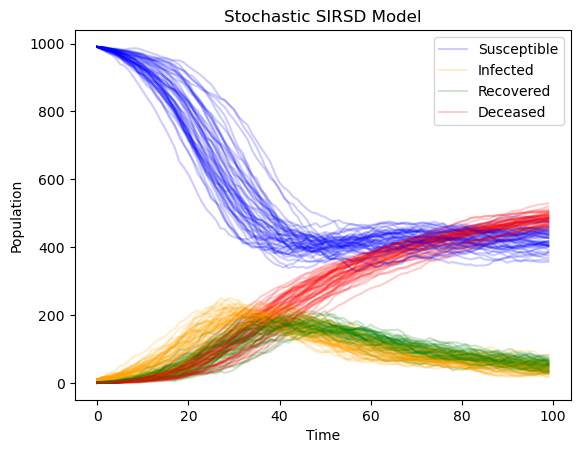

The likelihood that the disease will dissappear within 100 time units is: 0.0
The likelihood that we will all die within 100 time units is: 0.0
The likehood that the dicease exhibits cyclical behaviour is: 0.08


In [9]:

def simulate_sirsd_model(N, I0, R0, D0, beta, gamma, delta, mu, num_iterations):

    S = np.zeros(num_iterations)
    I = np.zeros(num_iterations)
    R = np.zeros(num_iterations)
    D = np.zeros(num_iterations)
        
    S[0] = N - I0 - R0
    I[0] = I0
    R[0] = R0
    D[0] = D0
        
    for t in range(1, num_iterations):

        susceptible_t0_infected = np.random.binomial(S[t-1], beta*I[t-1]/N)
        # infected_to_recovered = np.random.binomial(I[t-1], gamma)
        # infected_to_dead = np.random.binomial(I[t-1], mu)
        infected_to_smth = np.random.multinomial(I[t-1], [gamma, mu, 1-gamma-mu])
        infected_to_recovered = infected_to_smth[0]
        infected_to_dead = infected_to_smth[1]
        recovered_to_susceptible = np.random.binomial(R[t-1], delta)

        S[t] = S[t-1] - susceptible_t0_infected + recovered_to_susceptible
        I[t] = I[t-1] + susceptible_t0_infected - infected_to_recovered - infected_to_dead
        R[t] = R[t-1] + infected_to_recovered - recovered_to_susceptible
        D[t] = D[t-1] + infected_to_dead
        #print(S[t], I[t], R[t], D[t], S[t]+I[t]+R[t]+D[t])


    return S, I, R, D

# Parameters
N = 1000 # Total population size
I0 = 10 # Initial number of infected individuals
R0 = 0 # Initial number of recovered individuals
D0 = 0 # Initial number of deceased individuals
beta = 0.3 # Transmission rate
gamma = 0.1 # Recovery rate
delta = 0.1 # Reinfection rate
mu = 0.05 # Virus death rate
num_iterations = 100 # Number of iterations to simulate
time = np.arange(num_iterations)
birth_rate = 100/N
death_rate = 100/N
num_sims = 50
count1 = 0
count2 = 0
count3 = 0

S_SIRSD = np.zeros((num_sims, num_iterations))
I_SIRSD = np.zeros((num_sims, num_iterations))
R_SIRSD = np.zeros((num_sims, num_iterations))
D_SIRSD = np.zeros((num_sims, num_iterations))

for i in range(num_sims):
    # Simulate SIRSD model
    S, I, R, D = simulate_sirsd_model(N, I0, R0, D0, beta, gamma, delta, mu, num_iterations)
    S_SIRSD[i,:] = S
    I_SIRSD[i,:] = I
    R_SIRSD[i,:] = R
    D_SIRSD[i,:] = D

    if np.any(I_SIRSD[i, :] == 0):
        count1 += 1
    for j in range(num_iterations):
        if (S_SIRSD[i, j] == 0) and (R_SIRSD[i, j] == 0):
            count3 += 1
    check_list = set()
    for j in range(num_iterations):
        tmp = (S_SIRSD[i,j], I_SIRSD[i,j], R_SIRSD[i,j], D_SIRSD[i,j])
        if tmp in check_list:
            count2 += 1
            #print('Repeated elements found in simulation', i)
            break
        check_list.add(tmp)
    #else:
        #print('No repetitive elemenents were found in simulation', i)
    
    # Plot the SIRSD model
    plt.plot(time, S_SIRSD[i, :], color='blue', alpha=0.2)
    plt.plot(time, I_SIRSD[i, :], color='orange', alpha=0.2)
    plt.plot(time, R_SIRSD[i, :], color='green', alpha=0.2)
    plt.plot(time, D_SIRSD[i, :], color='red', alpha=0.2)

plt.plot(time, S_SIRSD[0, :], color='blue', alpha=0.2, label='Susceptible')
plt.plot(time, I_SIRSD[0, :], color='orange', alpha=0.2, label='Infected')
plt.plot(time, R_SIRSD[0, :], color='green', alpha=0.2, label='Recovered')
plt.plot(time, D_SIRSD[0, :], color='red', alpha=0.2, label='Deceased')
plt.title('Stochastic SIRSD Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

print('The likelihood that the disease will dissappear within',num_iterations,'time units is:',count1/num_sims)
print('The likelihood that we will all die within',num_iterations,'time units is:',count3/num_sims)
#print(count2,'out of',num_sims,'simulations exhibit repeated elements')
print('The likehood that the dicease exhibits cyclical behaviour is:',count2/num_sims)

SEIR

Once again we introduced a fourth state for the exposed individuals, who are those that are infected but not yet infectious.

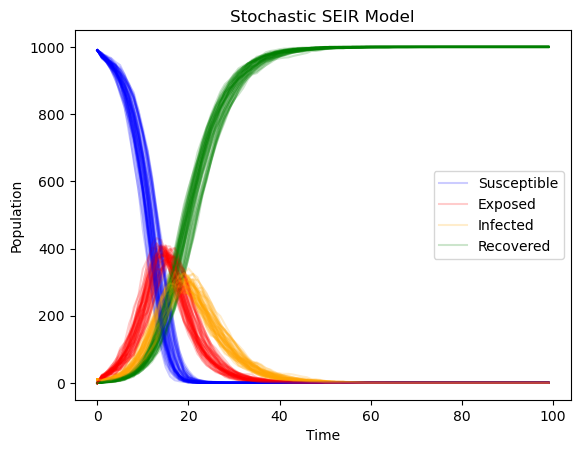

The likelihood that the disease will dissappear within 100 time units is: 1.0
50 out of 50 simulations exhibit repeated elements


In [10]:

def simulate_seir_model(N, E0, I0, R0, alpha, beta, gamma, delta, num_iterations):

    S = np.zeros(num_iterations)
    E = np.zeros(num_iterations)
    I = np.zeros(num_iterations)
    R = np.zeros(num_iterations)
        
    S[0] = N - I0 
    E[0] = E0
    I[0] = I0
    R[0] = R0
        
    for t in range(1, num_iterations):

        susceptible_to_infected = np.random.binomial(S[t-1], beta*I[t-1]/N)

        exposed_to_infected = np.random.binomial(E[t-1], alpha)

        infected_to_recovered = np.random.binomial(I[t-1], gamma)

        recovered_to_susceptible = np.random.binomial(R[t-1], delta)

        S[t] = S[t-1] - susceptible_to_infected + recovered_to_susceptible
        E[t] = E[t-1] + susceptible_to_infected - exposed_to_infected
        I[t] = I[t-1] + exposed_to_infected - infected_to_recovered
        R[t] = R[t-1] + infected_to_recovered - recovered_to_susceptible
        #print(S[t], E[t], I[t], R[t], S[t]+E[t]+I[t]+R[t])

    return S, E, I, R

# Parameters
N = 1000 # Total population size
E0 = 0
I0 = 10 # Initial number of infected individuals
R0 = 0 # Initial number of recovered individuals
alpha = 0.2 # exposed rate
beta = 1.6 # Transmission rate
gamma = 0.2 # Recovery rate
delta = 0
num_iterations = 100 # Number of iterations to simulate
time = np.arange(num_iterations)
num_sims = 50
count1 = 0
count2 = 0

S_SEIR2 = np.zeros((num_sims, num_iterations))
E_SEIR2 = np.zeros((num_sims, num_iterations))
I_SEIR2 = np.zeros((num_sims, num_iterations))
R_SEIR2 = np.zeros((num_sims, num_iterations))

for i in range(num_sims):
    # Simulate SIRSD model
    S, E, I, R = simulate_seir_model(N, E0, I0, R0, alpha, beta, gamma, delta, num_iterations)
    S_SEIR2[i,:] = S
    E_SEIR2[i,:] = E
    I_SEIR2[i,:] = I
    R_SEIR2[i,:] = R

    if np.any(E_SEIR2[i, :] == 0) and np.any(I_SEIR2[i, :] == 0):
        count1 += 1
    check_list = set()
    for j in range(num_iterations):
        tmp = (S_SEIR2[i,j], E_SEIR2[i,j], I_SEIR2[i,j], R_SEIR2[i,j])
        if tmp in check_list:
            count2 += 1
            #print('Repeated elements found in simulation', i)
            break
        check_list.add(tmp)
    #else:
        #print('No repetitive elemenents were found in simulation', i)
    
    # Plot the SIRSD model
    plt.plot(time, S_SEIR2[i, :], color='blue', alpha=0.2)
    plt.plot(time, E_SEIR2[i, :], color='red', alpha=0.2)
    plt.plot(time, I_SEIR2[i, :], color='orange', alpha=0.2)
    plt.plot(time, R_SEIR2[i, :], color='green', alpha=0.2)

plt.plot(time, S_SEIR2[0, :], color='blue', alpha=0.2, label='Susceptible')
plt.plot(time, E_SEIR2[0, :], color='red', alpha=0.2, label='Exposed')
plt.plot(time, I_SEIR2[0, :], color='orange', alpha=0.2, label='Infected')
plt.plot(time, R_SEIR2[0, :], color='green', alpha=0.2, label='Recovered')
plt.title('Stochastic SEIR Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

print('The likelihood that the disease will dissappear within',num_iterations,'time units is:',count1/num_sims)
#print('The likelihood that we will all die within',num_iterations,'time units is:',count3/num_sims)
print(count2,'out of',num_sims,'simulations exhibit repeated elements')

A repetition of SEIR but with birth rate and death rate included.

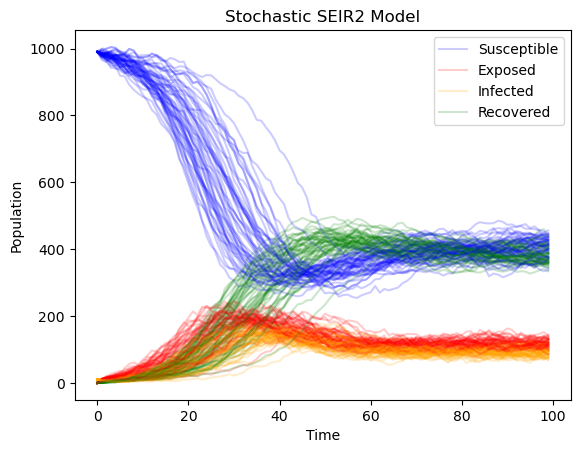

The likelihood that the disease will dissappear within 100 time units is: 0.0
The likelihood that we will all die within 100 time units is: 0.0
0 out of 50 simulations exhibit repeated elements


In [11]:

def simulate_seir2_model(N, E0, I0, R0, alpha, beta, gamma, L, mu, num_iterations):

    S = np.zeros(num_iterations)
    E = np.zeros(num_iterations)
    I = np.zeros(num_iterations)
    R = np.zeros(num_iterations)
        
    S[0] = N - I0 
    E[0] = E0
    I[0] = I0
    R[0] = R0
        
    for t in range(1, num_iterations):

        susceptible_to_smth = np.random.multinomial(S[t-1], [mu, beta*I[t-1]/N, 1-mu-beta*I[t-1]/N])
        susceptible_to_die = susceptible_to_smth[0]
        susceptible_to_exposed = susceptible_to_smth[1]

        exposed_to_smth = np.random.multinomial(E[t-1], [mu, alpha, 1-mu-alpha])
        exposed_to_die = exposed_to_smth[0]
        exposed_to_infected = exposed_to_smth[1]

        infected_to_smth = np.random.multinomial(I[t-1], [gamma, mu, 1-gamma-mu])
        infected_to_recovered = infected_to_smth[0]
        infected_to_die = infected_to_smth[1]

        recovered_to_die = np.random.binomial(R[t-1], mu)

        S[t] = S[t-1] + L - susceptible_to_die - susceptible_to_exposed
        E[t] = E[t-1] + susceptible_to_exposed - exposed_to_die - exposed_to_infected
        I[t] = I[t-1] + exposed_to_infected - infected_to_recovered - infected_to_die
        R[t] = R[t-1] + infected_to_recovered - recovered_to_die
        #print(S[t], E[t], I[t], R[t], S[t]+E[t]+I[t]+R[t])

    return S, E, I, R

# Parameters
N = 1000 # Total population size
E0 = 0
I0 = 10 # Initial number of infected individuals
R0 = 0 # Initial number of recovered individuals
alpha = 0.2 # exposed rate
beta = 0.8 # Transmission rate
gamma = 0.2 # Recovery rate
L = 50 # Birth rate
mu = 0.05 # Death rate
num_iterations = 100 # Number of iterations to simulate
time = np.arange(num_iterations)
num_sims = 50
count1 = 0
count2 = 0
count3 = 0

S_SEIR = np.zeros((num_sims, num_iterations))
E_SEIR = np.zeros((num_sims, num_iterations))
I_SEIR = np.zeros((num_sims, num_iterations))
R_SEIR = np.zeros((num_sims, num_iterations))

for i in range(num_sims):
    # Simulate SIRSD model
    S, E, I, R = simulate_seir2_model(N, E0, I0, R0, alpha, beta, gamma, L, mu, num_iterations)
    S_SEIR[i,:] = S
    E_SEIR[i,:] = E
    I_SEIR[i,:] = I
    R_SEIR[i,:] = R

    if np.any(I_SEIR[i, :] == 0):
        count1 += 1
    for j in range(num_iterations):
        if (S_SEIR[i, j] == 0) and (R_SEIR[i, j] == 0):
            count3 += 1
    check_list = set()
    for j in range(num_iterations):
        tmp = (S_SEIR[i,j], E_SEIR[i,j], I_SEIR[i,j], R_SEIR[i,j])
        if tmp in check_list:
            count2 += 1
            #print('Repeated elements found in simulation', i)
            break
        check_list.add(tmp)
    #else:
        #print('No repetitive elemenents were found in simulation', i)
    
    # Plot the SIRSD model
    plt.plot(time, S_SEIR[i, :], color='blue', alpha=0.2)
    plt.plot(time, E_SEIR[i, :], color='red', alpha=0.2)
    plt.plot(time, I_SEIR[i, :], color='orange', alpha=0.2)
    plt.plot(time, R_SEIR[i, :], color='green', alpha=0.2)

plt.plot(time, S_SEIR[0, :], color='blue', alpha=0.2, label='Susceptible')
plt.plot(time, E_SEIR[0, :], color='red', alpha=0.2, label='Exposed')
plt.plot(time, I_SEIR[0, :], color='orange', alpha=0.2, label='Infected')
plt.plot(time, R_SEIR[0, :], color='green', alpha=0.2, label='Recovered')
plt.title('Stochastic SEIR2 Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

print('The likelihood that the disease will dissappear within',num_iterations,'time units is:',count1/num_sims)
print('The likelihood that we will all die within',num_iterations,'time units is:',count3/num_sims)
print(count2,'out of',num_sims,'simulations exhibit repeated elements')

### SIRV

For a more realistic approach we showcase the vaccinated people in a separate state as well.

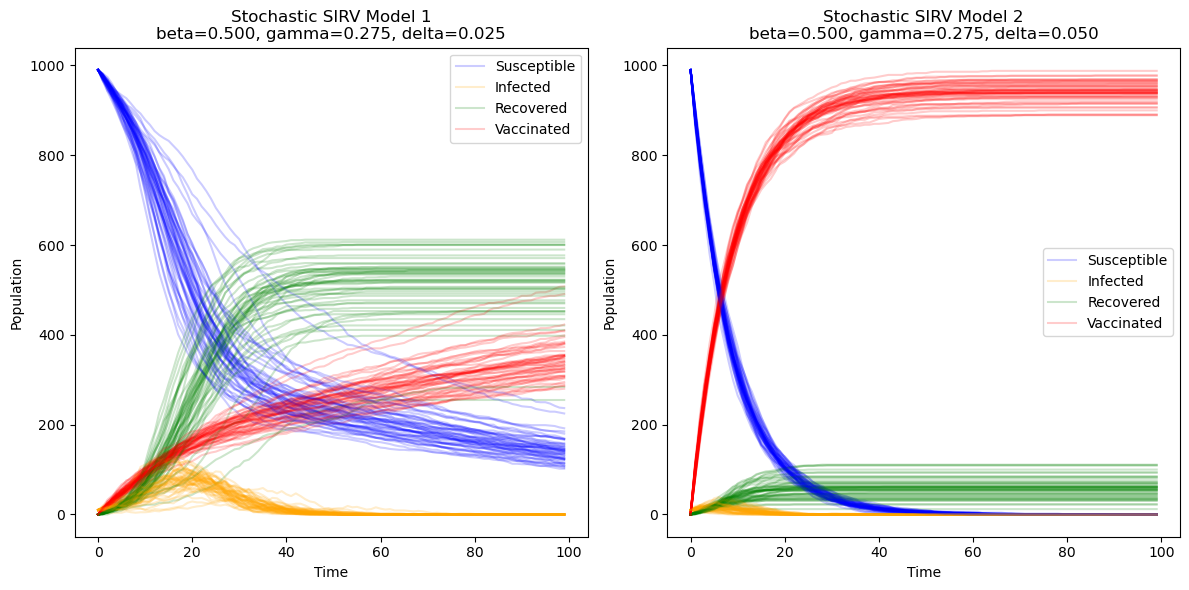

Model 1: The likelihood that the disease will disappear within 100 time units is: 1.0
Model 1: The likehood that the dicease exhibits cyclical behaviour is: 1.0

Model 2: The likelihood that the disease will disappear within 100 time units is: 1.0
Model 2: The likehood that the dicease exhibits cyclical behaviour is: 1.0


In [12]:
def simulate_sirv_model(N, I0, V0, R0, beta, gamma, u, num_iterations):

    S = np.zeros(num_iterations)
    I = np.zeros(num_iterations)
    R = np.zeros(num_iterations)
    V = np.zeros(num_iterations)
    
    S[0] = N - I0 - R0
    I[0] = I0
    R[0] = R0
    V[0] = V0
    
    for t in range(1, num_iterations):
        
        susceptible_to_smth = np.random.multinomial(S[t-1], [beta*I[t-1]/N, u, 1-beta*I[t-1]/N-u])
        susceptible_to_infected = susceptible_to_smth[0]
        susceptible_to_vaccinated = susceptible_to_smth[1]
        infected_to_recovered = np.random.binomial(I[t-1], gamma)
        
        S[t] = S[t-1] - susceptible_to_infected - susceptible_to_vaccinated
        I[t] = I[t-1] + susceptible_to_infected - infected_to_recovered
        R[t] = R[t-1] + infected_to_recovered
        V[t] = V[t-1] + susceptible_to_vaccinated
        #print(S[t], I[t], R[t], S[t]+I[t]+R[t])
    
    return S, I, R, V

# Parameters
N = 1000 # Total population size
I0 = 10 # Initial number of infected individuals
R0 = 0 # Initial number of recovered individuals
V0 = 0
beta1 = 0.5 # Transmission rate
gamma1 = 0.275 # Recovery/Removed rate
u1 = 0.01 # Vaccination rate
beta2 = 0.5 # Transmission rate
gamma2 = 0.275 # Recovery/Removed rate
u2 = 0.1 # Vaccination rate
num_iterations = 100 # Number of iterations to simulate
time = np.arange(num_iterations)
num_sims = 50

count1a = 0
count2a = 0
count1b = 0
count2b = 0
time_list = []
S_SIRV = np.zeros((num_sims, num_iterations))
I_SIRV = np.zeros((num_sims, num_iterations))
R_SIRV = np.zeros((num_sims, num_iterations))
V_SIRV = np.zeros((num_sims, num_iterations))

S_SIRV2 = np.zeros((num_sims, num_iterations))
I_SIRV2 = np.zeros((num_sims, num_iterations))
R_SIRV2 = np.zeros((num_sims, num_iterations))
V_SIRV2 = np.zeros((num_sims, num_iterations))

for i in range(num_sims):

    # Simulate SIR model
    S, I, R, V = simulate_sirv_model(N, I0, V0, R0, beta1, gamma1, u1, num_iterations)
    S_SIRV[i,:] = S
    I_SIRV[i,:] = I
    R_SIRV[i,:] = R
    V_SIRV[i,:] = V

    S, I, R, V = simulate_sirv_model(N, I0, V0, R0, beta2, gamma2, u2, num_iterations)
    S_SIRV2[i,:] = S
    I_SIRV2[i,:] = I
    R_SIRV2[i,:] = R
    V_SIRV2[i,:] = V

    if np.any(I_SIRV[i, :] == 0):
        count1a += 1

    check_list = set()
    time_sublist = []
    for j in range(num_iterations):
        tmp = (S_SIRV[i,j], I_SIRV[i,j], R_SIRV[i,j])
        if tmp in check_list:
            count2a += 1
            time_sublist.append(j)
            #print('Repeated elements found in simulation', i)
            break
        check_list.add(tmp)
    #else:
        #print('No repetitive elemenents were found in simulation', i)
    if len(time_sublist) != 0:
        time_list.append(time_sublist)

    if np.any(I_SIRV2[i, :] == 0):
        count1b += 1

    check_list = set()
    time_sublist = []
    for j in range(num_iterations):
        tmp = (S_SIRV2[i,j], I_SIRV2[i,j], R_SIRV2[i,j])
        if tmp in check_list:
            count2b += 1
            time_sublist.append(j)
            #print('Repeated elements found in simulation', i)
            break
        check_list.add(tmp)

# Plot the SIR model
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i in range(num_sims):
    axs[0].plot(time, S_SIRV[i, :], color='blue', alpha=0.2)
    axs[0].plot(time, I_SIRV[i, :], color='orange', alpha=0.2)
    axs[0].plot(time, R_SIRV[i, :], color='green', alpha=0.2)
    axs[0].plot(time, V_SIRV[i, :], color='red', alpha=0.2)

    axs[1].plot(time, S_SIRV2[i, :], color='blue', alpha=0.2)
    axs[1].plot(time, I_SIRV2[i, :], color='orange', alpha=0.2)
    axs[1].plot(time, R_SIRV2[i, :], color='green', alpha=0.2)
    axs[1].plot(time, V_SIRV2[i, :], color='red', alpha=0.2)

axs[0].set_title('Stochastic SIRV Model 1\nbeta={:.3f}, gamma={:.3f}, delta={:.3f}'.format(beta1, gamma1, delta1))
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Population')
axs[0].legend(['Susceptible', 'Infected', 'Recovered', 'Vaccinated'])

axs[1].set_title('Stochastic SIRV Model 2\nbeta={:.3f}, gamma={:.3f}, delta={:.3f}'.format(beta2, gamma2, delta2))
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Population')
axs[1].legend(['Susceptible', 'Infected', 'Recovered', 'Vaccinated'])

plt.tight_layout()
plt.show()

print('Model 1: The likelihood that the disease will disappear within',num_iterations,'time units is:',count1a/num_sims)
#print(count2,'out of',num_sims,'simulations exhibit repeated elements at times', time_list)
print('Model 1: The likehood that the dicease exhibits cyclical behaviour is:',count2a/num_sims)
print()
print('Model 2: The likelihood that the disease will disappear within',num_iterations,'time units is:',count1b/num_sims)
#print(count2,'out of',num_sims,'simulations exhibit repeated elements at times', time_list)
print('Model 2: The likehood that the dicease exhibits cyclical behaviour is:',count2b/num_sims)

# EVERYTHING EVERYWHERE ALL AT ONCE

without birth rate and death rate

t= 1

8 6

0 0

2 0

0

1026.0 8.0 8.0 2.0 6.0 0.0
t= 2

12 5

1 0

0 0

0

1059.0 19.0 9.0 2.0 11.0 0.0
t= 3

8 6

7 0

2 0

0

1095.0 20.0 14.0 4.0 17.0 0.0
t= 4

19 7

3 0

1 0

1

1119.0 36.0 16.0 4.0 24.0 0.0
t= 5

12 4

7 1

1 0

0

1153.0 40.0 22.0 5.0 28.0 1.0
t= 6

33 7

4 0

2 0

1

1163.0 69.0 24.0 6.0 35.0 1.0
t= 7

30 6

3 0

4 0

1

1177.0 96.0 23.0 9.0 41.0 1.0
t= 8

19 11

13 1

1 0

0

1197.0 101.0 35.0 10.0 52.0 2.0
t= 9

38 10

6 0

3 0

1

1199.0 133.0 38.0 12.0 62.0 2.0
t= 10

42 3

22 2

2 1

2

1204.0 151.0 57.0 12.0 65.0 5.0
t= 11

71 10

17 2

8 1

3

1173.0 203.0 65.0 17.0 75.0 8.0
t= 12

65 6

23 1

3 1

2

1152.0 244.0 84.0 18.0 81.0 10.0
t= 13

80 3

24 1

6 0

1

1119.0 299.0 102.0 23.0 84.0 11.0
t= 14

106 7

30 2

11 0

1

1056.0 373.0 121.0 33.0 91.0 13.0
t= 15

111 7

37 3

16 2

3

988.0 444.0 140.0 46.0 98.0 18.0
t= 16

137 8

42 5

11 1

6

893.0 534.0 170.0 51.0 106.0 24.0
t= 17

128 6

46 7

19 1

9

809.0 609.0 196.0 61.0 112.0 32.0
t= 18

147 8


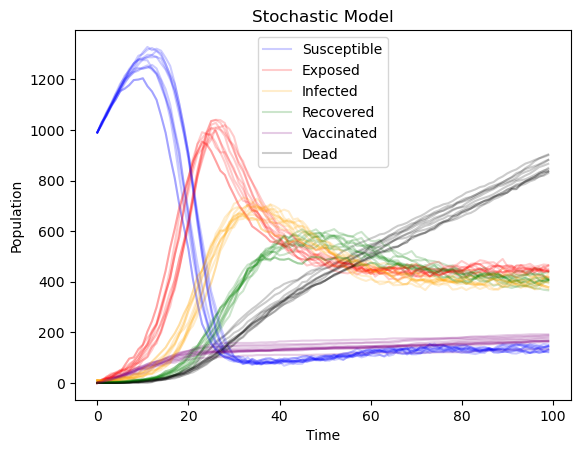

The likelihood that the disease will dissappear within 100 time units is: 0.0
The likelihood that we will all die within 100 time units is: 0.0
The likehood that the disease exhibits cyclical behaviour is: 0.0


In [13]:
def model1(N, E0, I0, R0, V0, D0, alpha, beta, gamma, delta, epsilon, u, num_iterations):
    
    S = np.zeros(num_iterations)
    E = np.zeros(num_iterations)
    I = np.zeros(num_iterations)
    R = np.zeros(num_iterations)
    V = np.zeros(num_iterations)
    D = np.zeros(num_iterations)

    S[0] = N - I0
    E[0] = E0
    I[0] = I0
    R[0] = R0
    V[0] = V0
    D[0] = D0

    for t in range(1, num_iterations):

        susceptible_to_smth = np.random.multinomial(S[t-1], [beta*I[t-1]/N, u, 1-beta*I[t-1]/N-u])
        susceptible_to_exposed = susceptible_to_smth[0]
        susceptible_to_vaccinated = susceptible_to_smth[1]

        exposed_to_smth = np.random.multinomial(E[t-1], [alpha, epsilon, 1-alpha-epsilon])
        exposed_to_infected = exposed_to_smth[0]
        exposed_to_dead = exposed_to_smth[1]

        infected_to_smth = np.random.multinomial(I[t-1], [gamma, epsilon, 1-gamma-epsilon])
        infected_to_recovered = infected_to_smth[0]
        infected_to_dead = infected_to_smth[1]

        recovered_to_susceptible = np.random.binomial(R[t-1], delta)

        S[t] = S[t-1] + L - susceptible_to_exposed - susceptible_to_vaccinated
        E[t] = E[t-1] - exposed_to_infected - exposed_to_dead + susceptible_to_exposed
        I[t] = I[t-1] - infected_to_recovered - infected_to_dead + exposed_to_infected
        R[t] = R[t-1] - recovered_to_susceptible + infected_to_recovered
        V[t] = V[t-1] + susceptible_to_vaccinated
        D[t] = D[t-1] + exposed_to_dead + infected_to_dead
        #print(S[t],E[t],I[t],R[t],V[t],D[t])

    return S, E, I, R, V, D
    
# Parameters
N = 1000 # Total population size
E0 = 0
I0 = 10 # Initial number of infected individuals
R0 = 0 # Initial number of recovered individuals
V0 = 0
Dn0 = 0
Dd0 = 0
alpha = 0.1 # exposed rate
beta = 0.9 # Transmission rate
gamma = 0.1 # Recovery rate
delta = 0.1 # reinfection rate
epsilon = 0.01 # virus death rate
u = 0.005 # vaccination rate
num_iterations = 100 # Number of iterations to simulate
time = np.arange(num_iterations)
num_sims = 10
count1 = 0
count2 = 0
count3 = 0

Sf = np.zeros((num_sims, num_iterations))
Ef = np.zeros((num_sims, num_iterations))
If = np.zeros((num_sims, num_iterations))
Rf = np.zeros((num_sims, num_iterations))
Vf = np.zeros((num_sims, num_iterations))
Df = np.zeros((num_sims, num_iterations))

for k in range(num_sims):
        # Simulate model
        s,e,i,r,v,d = model1(N, E0, I0, R0, V0, D0, alpha, beta, gamma, delta, epsilon, u, num_iterations)
        Sf[k,:] = s
        Ef[k,:] = e
        If[k,:] = i
        Rf[k,:] = r
        Vf[k,:] = v
        Df[k,:] = d

        if np.any(Ef[k,:] == 0) and np.any(If[k,:] == 0):
             count1 += 1
        check_list = set()
        for j in range(num_iterations):
            if (Sf[k,j] + Ef[k,j] + If[k,j] + Rf[k,j] + Vf[k,j] == 0):
                 count3 += 1
        for j in range(num_iterations):
            tmp = (Sf[k,j], Ef[k,j], If[k,j], Rf[k,j])
            if tmp in check_list:
                count2 += 1
            #print('Repeated elements found in simulation', i)
                break
            check_list.add(tmp)
        
        plt.plot(time, Sf[k, :], color='blue', alpha=0.2)
        plt.plot(time, Ef[k, :], color='red', alpha=0.2)
        plt.plot(time, If[k, :], color='orange', alpha=0.2)
        plt.plot(time, Rf[k, :], color='green', alpha=0.2)
        plt.plot(time, Vf[k, :], color='purple', alpha=0.2)
        plt.plot(time, Df[k, :], color='black', alpha=0.2)

plt.plot(time, Sf[0, :], color='blue', alpha=0.2, label='Susceptible')
plt.plot(time, Ef[0, :], color='red', alpha=0.2, label='Exposed')
plt.plot(time, If[0, :], color='orange', alpha=0.2, label='Infected')
plt.plot(time, Rf[0, :], color='green', alpha=0.2, label='Recovered')
plt.plot(time, Vf[k, :], color='purple', alpha=0.2, label='Vaccinated')
plt.plot(time, Df[k, :], color='black', alpha=0.2, label='Dead')
plt.title('Stochastic Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

print('The likelihood that the disease will dissappear within',num_iterations,'time units is:',count1/num_sims)
print('The likelihood that we will all die within',num_iterations,'time units is:',count3/num_sims)
#print(count2,'out of',num_sims,'simulations exhibit repeated elements')
print('The likehood that the disease exhibits cyclical behaviour is:',count2/num_sims)        

with birth rate and death rate

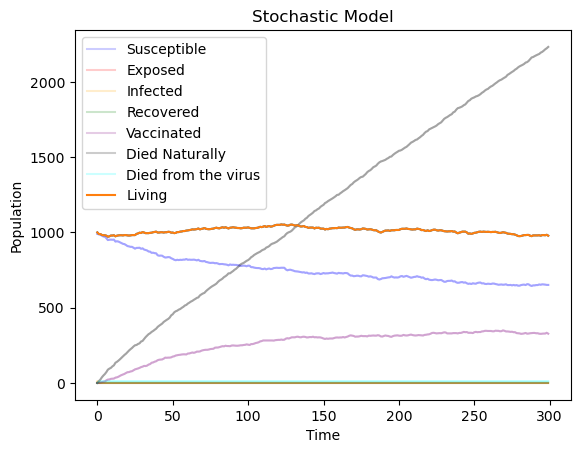

The likelihood that the disease will dissappear within 300 time units is: 1.0
The likelihood that we will all die within 300 time units is: 0.0
The likehood that the dicease exhibits cyclical behaviour is: 1.0


In [14]:
def model(N, E0, I0, R0, V0, Dn0, Dd0, alpha, beta, gamma, delta, epsilon, u, mu, L, num_iterations):
    
    S = np.zeros(num_iterations)
    E = np.zeros(num_iterations)
    I = np.zeros(num_iterations)
    R = np.zeros(num_iterations)
    V = np.zeros(num_iterations)
    Dn = np.zeros(num_iterations)
    Dd = np.zeros(num_iterations)

    S[0] = N - I0
    E[0] = E0
    I[0] = I0
    R[0] = R0
    V[0] = V0
    Dn[0] = Dn0
    Dd[0] = Dd0

    for t in range(1, num_iterations):
        #print('t=',t)
        #print()

        susceptible_to_smth = np.random.multinomial(S[t-1], [beta*I[t-1]/N, mu, u, 1-beta*I[t-1]/N-mu-u])
        susceptible_to_exposed = susceptible_to_smth[0]
        susceptible_to_dead = susceptible_to_smth[1]
        susceptible_to_vaccinated = susceptible_to_smth[2]
        #print(susceptible_to_exposed, susceptible_to_dead, susceptible_to_vaccinated)
        #print()

        exposed_to_smth = np.random.multinomial(E[t-1], [mu, alpha, epsilon, 1-mu-alpha-epsilon])
        exposed_to_die_naturally = exposed_to_smth[0]
        exposed_to_infected = exposed_to_smth[1]
        exposed_to_die_virus = exposed_to_smth[2]
        #print(exposed_to_die_naturally, exposed_to_infected, exposed_to_die_virus)
        #print()

        infected_to_smth = np.random.multinomial(I[t-1], [gamma, mu, epsilon, 1-gamma-mu-epsilon])
        infected_to_recovered = infected_to_smth[0]
        infected_to_die_naturally = infected_to_smth[1]
        infected_to_die_virus = infected_to_smth[2]
        #print(infected_to_recovered, infected_to_die_naturally, infected_to_die_virus)
        #print()

        recovered_to_smth = np.random.multinomial(R[t-1], [mu, delta, 1-mu-delta])
        recovered_to_die = recovered_to_smth[0]
        recovered_to_susceptible = recovered_to_smth[1]
        #print(recovered_to_die, recovered_to_susceptible)
        #print()

        vaccinated_to_die = np.random.binomial(V[t-1], mu)
        #print(vaccinated_to_die)
        #print()

        S[t] = S[t-1] + L - susceptible_to_exposed - susceptible_to_dead - susceptible_to_vaccinated
        E[t] = E[t-1] - exposed_to_die_naturally - exposed_to_infected - exposed_to_die_virus + susceptible_to_exposed
        I[t] = I[t-1] - infected_to_recovered - infected_to_die_naturally - infected_to_die_virus + exposed_to_infected
        R[t] = R[t-1] - recovered_to_die - recovered_to_susceptible + infected_to_recovered
        V[t] = V[t-1] + susceptible_to_vaccinated - vaccinated_to_die
        Dn[t] = Dn[t-1] + susceptible_to_dead + exposed_to_die_naturally + infected_to_die_naturally + recovered_to_die
        Dd[t] = Dd[t-1] + exposed_to_die_virus + infected_to_die_virus
        #print(S[t],E[t],I[t],R[t],V[t],Dn[t],Dd[t])

    return S, E, I, R, V, Dn, Dd
    
# Parameters
N = 1000 # Total population size
E0 = 0
I0 = 10 # Initial number of infected individuals
R0 = 0 # Initial number of recovered individuals
V0 = 0
Dn0 = 0
Dd0 = 0
alpha = 0.1 # exposed rate
beta = 0.1 # Transmission rate
gamma = 0.01 # Recovery rate
delta = 0.1 # reinfection rate
epsilon = 0.8 # virus death rate
u = 0.005 # vaccination rate
mu = 0.01 # death rate
L = mu*N # birth rate
num_iterations = 300 # Number of iterations to simulate
time = np.arange(num_iterations)
num_sims = 1
count1 = 0
count2 = 0
count3 = 0

Sf = np.zeros((num_sims, num_iterations))
Ef = np.zeros((num_sims, num_iterations))
If = np.zeros((num_sims, num_iterations))
Rf = np.zeros((num_sims, num_iterations))
Vf = np.zeros((num_sims, num_iterations))
Dnf = np.zeros((num_sims, num_iterations))
Ddf = np.zeros((num_sims, num_iterations))

for k in range(num_sims):
        # Simulate model
        s,e,i,r,v,dn,dd = model(N, E0, I0, R0, V0, Dn0, Dd0, alpha, beta, gamma, delta, epsilon, u, mu, L, num_iterations)
        Sf[k,:] = s
        Ef[k,:] = e
        If[k,:] = i
        Rf[k,:] = r
        Vf[k,:] = v
        Dnf[k,:] = dn
        Ddf[k,:] = dd

        if np.any(Ef[k,:] == 0) and np.any(If[k,:] == 0):
             count1 += 1
        check_list = set()
        for j in range(num_iterations):
            if (Sf[k,j] + Ef[k,j] + If[k,j] + Rf[k,j] + Vf[k,j] == 0):
                 count3 += 1
        for j in range(num_iterations):
            tmp = (Sf[k,j], Ef[k,j], If[k,j], Rf[k,j])
            if tmp in check_list:
                count2 += 1
            #print('Repeated elements found in simulation', i)
                break
            check_list.add(tmp)
        
        plt.plot(time, Sf[k, :], color='blue', alpha=0.2)
        plt.plot(time, Ef[k, :], color='red', alpha=0.2)
        plt.plot(time, If[k, :], color='orange', alpha=0.2)
        plt.plot(time, Rf[k, :], color='green', alpha=0.2)
        plt.plot(time, Vf[k, :], color='purple', alpha=0.2)
        plt.plot(time, Dnf[k, :], color='black', alpha=0.2)
        plt.plot(time, Ddf[k, :], color='cyan', alpha=0.2)
        plt.plot(time, Sf[k,:]+Ef[k,:]+If[k,:]+Rf[k,:]+Vf[k,:])

plt.plot(time, Sf[0, :], color='blue', alpha=0.2, label='Susceptible')
plt.plot(time, Ef[0, :], color='red', alpha=0.2, label='Exposed')
plt.plot(time, If[0, :], color='orange', alpha=0.2, label='Infected')
plt.plot(time, Rf[0, :], color='green', alpha=0.2, label='Recovered')
plt.plot(time, Vf[k, :], color='purple', alpha=0.2, label='Vaccinated')
plt.plot(time, Dnf[k, :], color='black', alpha=0.2, label='Died Naturally')
plt.plot(time, Ddf[k, :], color='cyan', alpha=0.2, label='Died from the virus')
plt.plot(time, Sf[0,:]+Ef[0,:]+If[0,:]+Rf[0,:]+Vf[0,:], label='Living')
plt.title('Stochastic Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

print('The likelihood that the disease will dissappear within',num_iterations,'time units is:',count1/num_sims)
print('The likelihood that we will all die within',num_iterations,'time units is:',count3/num_sims)
#print(count2,'out of',num_sims,'simulations exhibit repeated elements')      
print('The likehood that the dicease exhibits cyclical behaviour is:',count2/num_sims)  

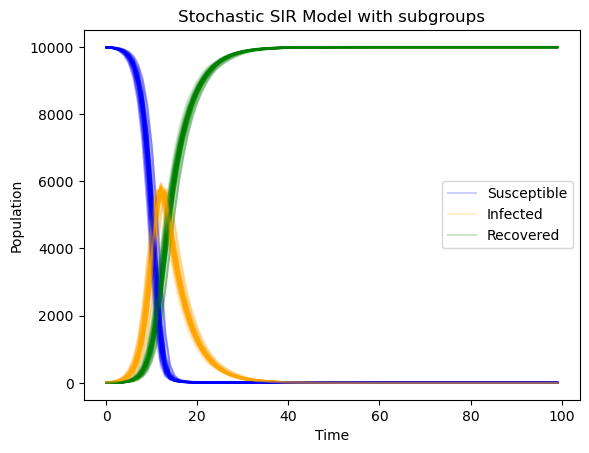

The likelihood that the disease will disappear within 100 time units is: 1.0
The likehood that the dicease exhibits cyclical behaviour is: 1.0


In [15]:
def simulate_sir_groups_model(N, I0, R0, beta, gamma, num_iterations):

    S = np.zeros(num_iterations)
    I = np.zeros(num_iterations)
    R = np.zeros(num_iterations)
    
    S[0] = N - I0 - R0
    I[0] = I0
    R[0] = R0
    
    for t in range(1, num_iterations):
        
        #susceptible_to_infected1 = np.random.binomial(S[t-1], beta[0]*I[t-1]/N)
        #susceptible_to_infected2 = np.random.binomial(S[t-1], beta[1]*I[t-1]/N)
        #susceptible_to_infected3 = np.random.binomial(S[t-1], beta[2]*I[t-1]/N)
        #susceptible_to_infected = susceptible_to_infected1 + susceptible_to_infected2 + susceptible_to_infected3

        susceptible_to_infected = np.random.multinomial(S[t-1], [beta[0]*I[t-1]/N, beta[1]*I[t-1]/N, beta[2]*I[t-1]/N, 1-beta[0]*I[t-1]/N-beta[1]*I[t-1]/N-beta[2]*I[t-1]/N])
        infected_to_recovered = np.random.binomial(I[t-1], gamma)
        
        S[t] = S[t-1] - susceptible_to_infected[0] - susceptible_to_infected[1] - susceptible_to_infected[2]
        I[t] = I[t-1] + susceptible_to_infected[0] + susceptible_to_infected[1] + susceptible_to_infected[2] - infected_to_recovered
        R[t] = R[t-1] + infected_to_recovered
        #print(S[t], I[t], R[t], S[t]+I[t]+R[t])
    
    return S, I, R

# Parameters
N = 10000 # Total population size
I0 = 10 # Initial number of infected individuals
R0 = 0 # Initial number of recovered individuals
beta_family = 0.1 # Transmission rate family
beta_work = 0.3 # Transmission rate work
beta_public_tr = 0.7 # Transmission rate public transport
beta = np.array([beta_family, beta_work, beta_public_tr])
gamma = 0.2 # Recovery/Removed rate
num_iterations = 100 # Number of iterations to simulate
time = np.arange(num_iterations)
num_sims = 50

count1 = 0
count2 = 0
time_list = []
S_SIR = np.zeros((num_sims, num_iterations))
I_SIR = np.zeros((num_sims, num_iterations))
R_SIR = np.zeros((num_sims, num_iterations))

for i in range(num_sims):

    # Simulate SIR model
    S, I, R = simulate_sir_groups_model(N, I0, R0, beta, gamma, num_iterations)
    S_SIR[i,:] = S
    I_SIR[i,:] = I
    R_SIR[i,:] =  R

    if np.any(I_SIR[i, :] == 0):
        count1 += 1

    check_list = set()
    time_sublist = []
    for j in range(num_iterations):
        tmp = (S_SIR[i,j], I_SIR[i,j], R_SIR[i,j])
        if tmp in check_list:
            count2 += 1
            time_sublist.append(j)
            #print('Repeated elements found in simulation', i)
            break
        check_list.add(tmp)
    #else:
        #print('No repetitive elemenents were found in simulation', i)
    if len(time_sublist) != 0:
        time_list.append(time_sublist)

    # Plot the SIR model
    plt.plot(time, S_SIR[i, :], color='blue', alpha=0.2)
    plt.plot(time, I_SIR[i, :], color='orange', alpha=0.2)
    plt.plot(time, R_SIR[i, :], color='green', alpha=0.2)


plt.plot(time, S_SIR[0, :], color='blue', alpha=0.2, label='Susceptible')
plt.plot(time, I_SIR[0, :], color='orange', alpha=0.2, label='Infected')
plt.plot(time, R_SIR[0, :], color='green', alpha=0.2, label='Recovered')
plt.title('Stochastic SIR Model with subgroups')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

print('The likelihood that the disease will disappear within',num_iterations,'time units is:',count1/num_sims)
#print(count2,'out of',num_sims,'simulations exhibit repeated elements at times', time_list)
print('The likehood that the dicease exhibits cyclical behaviour is:',count2/num_sims)

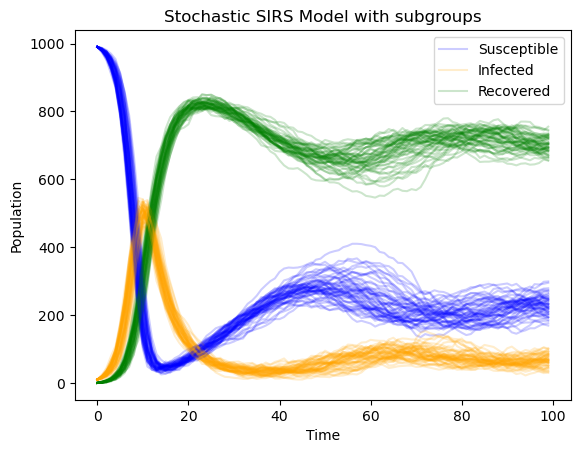

The likelihood that the disease will disappear within 100 time units is: 0.0
The likehood that the dicease exhibits cyclical behaviour is: 0.52


In [17]:
def simulate_sirs_groups_model(N, I0, R0, beta, gamma, delta, num_iterations):

    S = np.zeros(num_iterations)
    I = np.zeros(num_iterations)
    R = np.zeros(num_iterations)
    
    S[0] = N - I0 - R0
    I[0] = I0
    R[0] = R0
    
    for t in range(1, num_iterations):
        
        #susceptible_to_infected1 = np.random.binomial(S[t-1], beta[0]*I[t-1]/N)
        #susceptible_to_infected2 = np.random.binomial(S[t-1], beta[1]*I[t-1]/N)
        #susceptible_to_infected3 = np.random.binomial(S[t-1], beta[2]*I[t-1]/N)
        #susceptible_to_infected = susceptible_to_infected1 + susceptible_to_infected2 + susceptible_to_infected3

        susceptible_to_infected = np.random.multinomial(S[t-1], [beta[0]*I[t-1]/N, beta[1]*I[t-1]/N, beta[2]*I[t-1]/N, 1-beta[0]*I[t-1]/N-beta[1]*I[t-1]/N-beta[2]*I[t-1]/N])
        infected_to_recovered = np.random.binomial(I[t-1], gamma)
        recovered_to_susceptible = np.random.binomial(R[t-1], delta)
        
        S[t] = S[t-1] - susceptible_to_infected[0] - susceptible_to_infected[1] - susceptible_to_infected[2] + recovered_to_susceptible
        I[t] = I[t-1] + susceptible_to_infected[0] + susceptible_to_infected[1] + susceptible_to_infected[2] - infected_to_recovered
        R[t] = R[t-1] + infected_to_recovered - recovered_to_susceptible
        #print(S[t], I[t], R[t], S[t]+I[t]+R[t])
    
    return S, I, R

# Parameters
N = 1000 # Total population size
I0 = 10 # Initial number of infected individuals
R0 = 0 # Initial number of recovered individuals
beta_family = 0.01 # Transmission rate family
beta_work = 0.4 # Transmission rate work
beta_public_tr = 0.5 # Transmission rate public transport
beta = np.array([beta_family, beta_work, beta_public_tr])
gamma = 0.2 # Recovery/Removed rate
delta = 0.02 # Reinfection rate
num_iterations = 100 # Number of iterations to simulate
time = np.arange(num_iterations)
num_sims = 50

count1 = 0
count2 = 0
time_list = []
S_SIR = np.zeros((num_sims, num_iterations))
I_SIR = np.zeros((num_sims, num_iterations))
R_SIR = np.zeros((num_sims, num_iterations))

for i in range(num_sims):

    # Simulate SIR model
    S, I, R = simulate_sirs_groups_model(N, I0, R0, beta, gamma, delta, num_iterations)
    S_SIR[i,:] = S
    I_SIR[i,:] = I
    R_SIR[i,:] =  R

    if np.any(I_SIR[i, :] == 0):
        count1 += 1

    check_list = set()
    time_sublist = []
    for j in range(num_iterations):
        tmp = (S_SIR[i,j], I_SIR[i,j], R_SIR[i,j])
        if tmp in check_list:
            count2 += 1
            time_sublist.append(j)
            #print('Repeated elements found in simulation', i)
            break
        check_list.add(tmp)
    #else:
        #print('No repetitive elemenents were found in simulation', i)
    if len(time_sublist) != 0:
        time_list.append(time_sublist)

    # Plot the SIR model
    plt.plot(time, S_SIR[i, :], color='blue', alpha=0.2)
    plt.plot(time, I_SIR[i, :], color='orange', alpha=0.2)
    plt.plot(time, R_SIR[i, :], color='green', alpha=0.2)


plt.plot(time, S_SIR[0, :], color='blue', alpha=0.2, label='Susceptible')
plt.plot(time, I_SIR[0, :], color='orange', alpha=0.2, label='Infected')
plt.plot(time, R_SIR[0, :], color='green', alpha=0.2, label='Recovered')
plt.title('Stochastic SIRS Model with subgroups')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

print('The likelihood that the disease will disappear within',num_iterations,'time units is:',count1/num_sims)
#print(count2,'out of',num_sims,'simulations exhibit repeated elements at times', time_list)
print('The likehood that the dicease exhibits cyclical behaviour is:',count2/num_sims)